In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load the high-frequency historical trader data
historical_df = pd.read_csv('historical_data.csv')

In [3]:
historical_df.columns = (historical_df.columns.str.strip()
              .str.replace(r"\\s+", " ", regex=True)
              .str.replace(" ", "_")
              .str.lower())

In [4]:
historical_df

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [5]:
print('Shape of Historical data is',historical_df.shape)
print('---'*50)
historical_df.info()

Shape of Historical data is (211224, 16)
------------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   account           211224 non-null  object 
 1   coin              211224 non-null  object 
 2   execution_price   211224 non-null  float64
 3   size_tokens       211224 non-null  float64
 4   size_usd          211224 non-null  float64
 5   side              211224 non-null  object 
 6   timestamp_ist     211224 non-null  object 
 7   start_position    211224 non-null  float64
 8   direction         211224 non-null  object 
 9   closed_pnl        211224 non-null  float64
 10  transaction_hash  211224 non-null  object 
 11  order_id          211224 non-null  int64  
 12  crossed           21

In [6]:
historical_df = historical_df.drop_duplicates()

In [7]:
historical_df.describe()

,execution_price,size_tokens,size_usd,start_position,closed_pnl,order_id,fee,trade_id,timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


## Direct prints for rows, volume, tokens, fees, and PnL.

In [8]:
print('Sum of size usd: ',historical_df["size_usd"].sum())
print('Sum of size tokens: ',historical_df["size_tokens"].sum())
print('Sum of fee: ',historical_df["fee"].sum())
print('Sum of closed pnl: ',historical_df["closed_pnl"].sum())

Sum of size usd:  1191187442.4600003
Sum of size tokens:  976565644.2782929
Sum of fee:  245857.72056573076
Sum of closed pnl:  10296958.943436


In [9]:
# Simple central tendency without dicts
print('Mean of execution_price: ',historical_df["execution_price"].mean())
print('Median of execution_price: ',historical_df["execution_price"].median())
print('Mean of size_usd: ',historical_df["size_usd"].mean())
print('Median of size_usd: ',historical_df["size_usd"].median())

Mean of execution_price:  11414.723349993757
Median of execution_price:  18.28
Mean of size_usd:  5639.4512103738225
Median of size_usd:  597.0450000000001


In [10]:
historical_df['timestamp_ist']

0         02-12-2024 22:50
1         02-12-2024 22:50
2         02-12-2024 22:50
3         02-12-2024 22:50
4         02-12-2024 22:50
                ...       
211219    25-04-2025 15:35
211220    25-04-2025 15:35
211221    25-04-2025 15:35
211222    25-04-2025 15:35
211223    25-04-2025 15:35
Name: timestamp_ist, Length: 211224, dtype: object

In [11]:
historical_df['timestamp_ist'] = pd.to_datetime(historical_df['timestamp_ist'], format='%d-%m-%Y %H:%M', errors='coerce')
# Convert date column to datetime
historical_df['timestamp'] = pd.to_datetime(historical_df['timestamp'], errors='coerce', unit='ms')

In [12]:
historical_df

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,2025-06-15 15:06:40
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,2025-06-15 15:06:40
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,2025-06-15 15:06:40
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,2025-06-15 15:06:40


In [13]:
# grouped sums and counts shown as DataFrames.
historical_df.groupby("side")[["size_usd","fee","closed_pnl"]].sum().sort_values("size_usd", ascending=False)


,size_usd,fee,closed_pnl
side,,,
SELL,5.988684e+08,124825.836422,6.589148e+06
BUY,5.923191e+08,121031.884144,3.707811e+06


In [14]:
historical_df.groupby("side")["execution_price"].agg(["count","mean","median","min","max"])


,count,mean,median,min,max
side,,,,,
BUY,102696,13152.247545,18.99,0.000190,108261.0
SELL,108528,9770.568987,17.97,0.000005,109004.0


In [15]:
historical_df.groupby("coin")[["size_usd","fee","closed_pnl"]].sum().sort_values("size_usd", ascending=False).head(10)


,size_usd,fee,closed_pnl
coin,,,
BTC,6.442321e+08,139224.226804,8.680447e+05
HYPE,1.419902e+08,25361.930440,1.948485e+06
SOL,1.250748e+08,27956.304402,1.639556e+06
ETH,1.182810e+08,23091.303645,1.319979e+06
@107,5.576086e+07,5953.224788,2.783913e+06
FARTCOIN,8.311390e+06,2357.939012,-1.006872e+05
SUI,7.781168e+06,2003.206129,1.992688e+05
TRUMP,7.349347e+06,1729.745411,-3.648249e+05
MELANIA,7.040710e+06,1010.388542,3.903511e+05


In [16]:
num_col=historical_df.select_dtypes(exclude='object')
cat_col=historical_df.select_dtypes(include='object')

In [17]:
num_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   execution_price  211224 non-null  float64       
 1   size_tokens      211224 non-null  float64       
 2   size_usd         211224 non-null  float64       
 3   timestamp_ist    211224 non-null  datetime64[ns]
 4   start_position   211224 non-null  float64       
 5   closed_pnl       211224 non-null  float64       
 6   order_id         211224 non-null  int64         
 7   crossed          211224 non-null  bool          
 8   fee              211224 non-null  float64       
 9   trade_id         211224 non-null  float64       
 10  timestamp        211224 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(7), int64(1)
memory usage: 16.3 MB


In [18]:
cat_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   account           211224 non-null  object
 1   coin              211224 non-null  object
 2   side              211224 non-null  object
 3   direction         211224 non-null  object
 4   transaction_hash  211224 non-null  object
dtypes: object(5)
memory usage: 8.1+ MB


In [19]:
num_col.describe()

,execution_price,size_tokens,size_usd,timestamp_ist,start_position,closed_pnl,order_id,fee,trade_id,timestamp
count,211224.000000,2.112240e+05,2.112240e+05,211224,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,211224
mean,11414.723350,4.623365e+03,5.639451e+03,2025-01-31 12:04:22.915009792,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,2025-01-24 18:44:50.421542912
min,0.000005,8.740000e-07,0.000000e+00,2023-05-01 01:06:00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,2023-03-28 10:40:00
25%,4.854700,2.940000e+00,1.937900e+02,2024-12-31 21:00:45,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,2025-02-19 21:20:00
50%,18.280000,3.200000e+01,5.970450e+02,2025-02-24 18:55:00,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,2025-02-19 21:20:00
75%,101.580000,1.879025e+02,2.058960e+03,2025-04-02 18:22:00,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,2025-02-19 21:20:00
max,109004.000000,1.582244e+07,3.921431e+06,2025-05-01 12:13:00,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,2025-06-15 15:06:40
std,29447.654868,1.042729e+05,3.657514e+04,NaN,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,NaN


In [20]:
num_col.nunique()

execution_price     60162
size_tokens         59304
size_usd           118493
timestamp_ist       27977
start_position     196923
closed_pnl          90720
order_id            50555
crossed                 2
fee                138802
trade_id             2810
timestamp               7
dtype: int64

In [21]:
cat_col.nunique()

account                 32
coin                   246
side                     2
direction               12
transaction_hash    101184
dtype: int64

# cat analysis

In [22]:
cat_col

,account,coin,side,direction,transaction_hash
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,Buy,0xec09451986a1874e3a980418412fcd0201f500c95bac...
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,Buy,0xec09451986a1874e3a980418412fcd0201f500c95bac...
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,Buy,0xec09451986a1874e3a980418412fcd0201f500c95bac...
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,Buy,0xec09451986a1874e3a980418412fcd0201f500c95bac...
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,Buy,0xec09451986a1874e3a980418412fcd0201f500c95bac...
...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,SELL,Close Long,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,SELL,Close Long,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,SELL,Close Long,0x0780085b0c0a943eea800422374d920204c100edf579...
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,SELL,Close Long,0x349c29934913b25c89e20422374d920204cd008b8a0e...


In [23]:
cat_col=cat_col.drop(columns=['account', 'transaction_hash'])

In [24]:
cat_col

,coin,side,direction
0,@107,BUY,Buy
1,@107,BUY,Buy
2,@107,BUY,Buy
3,@107,BUY,Buy
4,@107,BUY,Buy
...,...,...,...
211219,FARTCOIN,SELL,Close Long
211220,FARTCOIN,SELL,Close Long
211221,FARTCOIN,SELL,Close Long
211222,FARTCOIN,SELL,Close Long


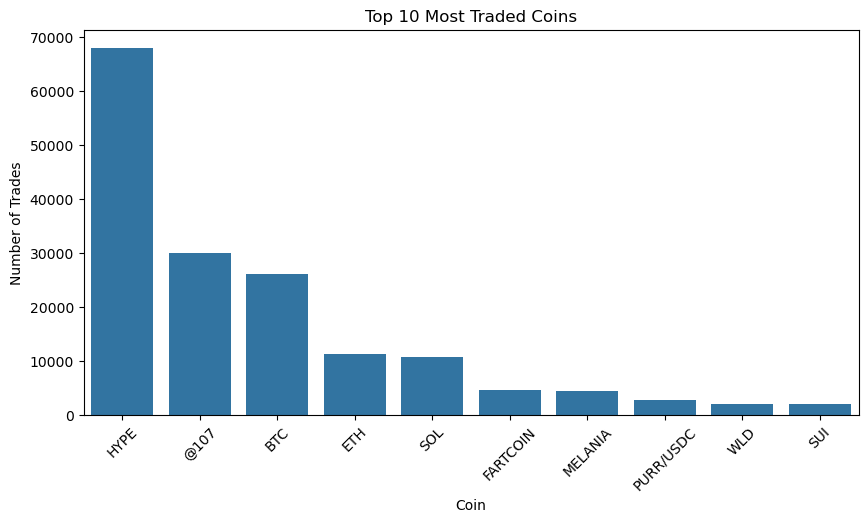

In [25]:
coin_counts = cat_col['coin'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=coin_counts.index, y=coin_counts.values)
plt.title('Top 10 Most Traded Coins')
plt.xlabel('Coin')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.show()


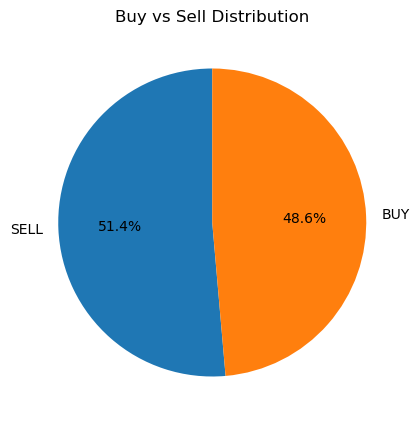

In [26]:
side_counts = historical_df['side'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(side_counts, labels=side_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Buy vs Sell Distribution')
plt.show()


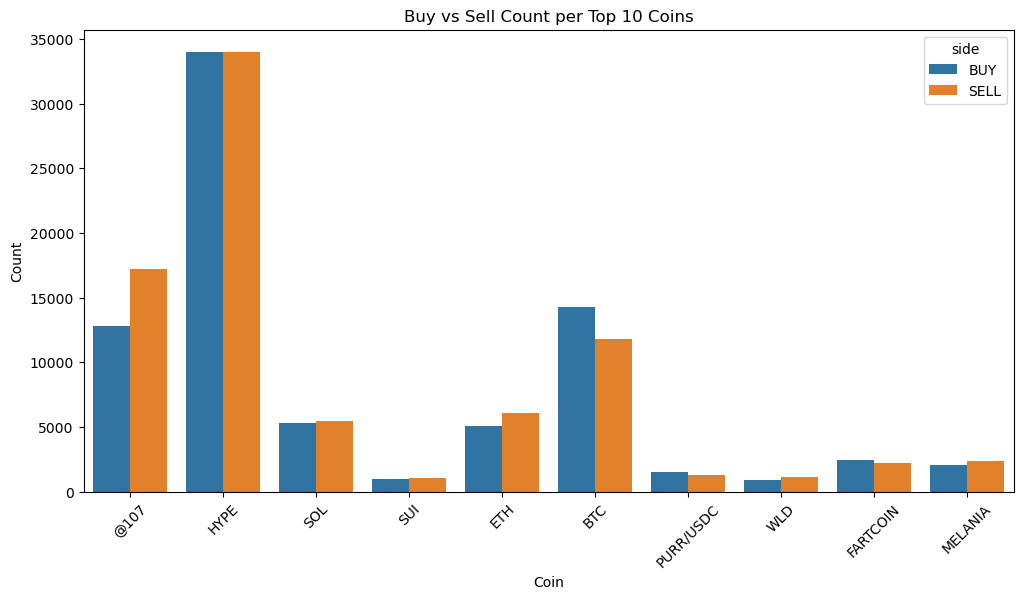

In [27]:
top_coins = historical_df['coin'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.countplot(data=historical_df[historical_df['coin'].isin(top_coins)], x='coin', hue='side')
plt.title('Buy vs Sell Count per Top 10 Coins')
plt.xlabel('Coin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


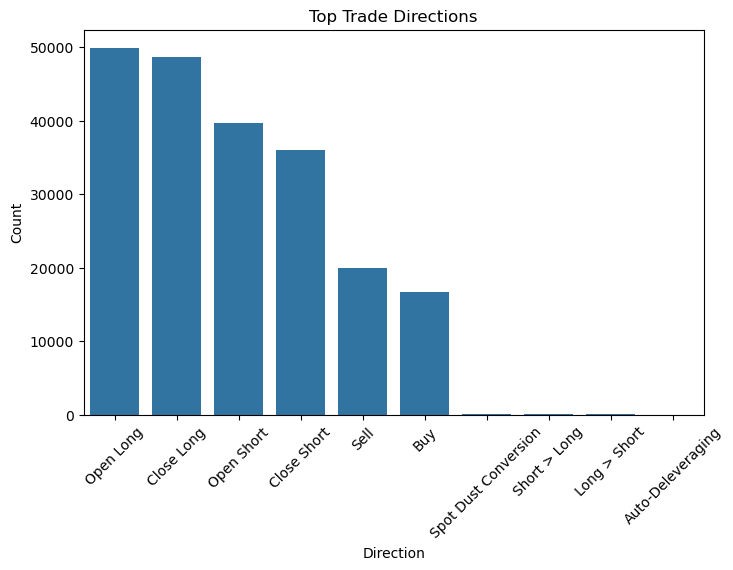

In [28]:
direction_counts = historical_df['direction'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=direction_counts.index, y=direction_counts.values)
plt.title('Top Trade Directions')
plt.xlabel('Direction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [29]:
print("Total unique coins:", historical_df['coin'].nunique())
print("Most traded coin:", historical_df['coin'].mode()[0])
print("Overall Buy percentage:", round((historical_df['side'].value_counts(normalize=True)['BUY']*100),2), "%")
print("Most common direction:", historical_df['direction'].mode()[0])


Total unique coins: 246
Most traded coin: HYPE
Overall Buy percentage: 48.62 %
Most common direction: Open Long


# num analysis

In [30]:
num_col=num_col.drop(columns=['order_id','crossed','trade_id','timestamp'])

In [31]:
num_col

,execution_price,size_tokens,size_usd,timestamp_ist,start_position,closed_pnl,fee
0,7.9769,986.87,7872.16,2024-12-02 22:50:00,0.000000,0.0000,0.345404
1,7.9800,16.00,127.68,2024-12-02 22:50:00,986.524596,0.0000,0.005600
2,7.9855,144.09,1150.63,2024-12-02 22:50:00,1002.518996,0.0000,0.050431
3,7.9874,142.98,1142.04,2024-12-02 22:50:00,1146.558564,0.0000,0.050043
4,7.9894,8.73,69.75,2024-12-02 22:50:00,1289.488521,0.0000,0.003055
...,...,...,...,...,...,...,...
211219,1.1010,382.20,420.80,2025-04-25 15:35:00,7546.600000,-20.2566,0.042080
211220,1.1010,2124.10,2338.63,2025-04-25 15:35:00,7164.400000,-112.5773,0.233863
211221,1.1010,423.40,466.16,2025-04-25 15:35:00,5040.300000,-22.4402,0.046616
211222,1.1010,3599.80,3963.38,2025-04-25 15:35:00,4616.900000,-190.7894,0.396337


In [32]:
num_col.describe()

,execution_price,size_tokens,size_usd,timestamp_ist,start_position,closed_pnl,fee
count,211224.000000,2.112240e+05,2.112240e+05,211224,2.112240e+05,211224.000000,211224.000000
mean,11414.723350,4.623365e+03,5.639451e+03,2025-01-31 12:04:22.915009792,-2.994625e+04,48.749001,1.163967
min,0.000005,8.740000e-07,0.000000e+00,2023-05-01 01:06:00,-1.433463e+07,-117990.104100,-1.175712
25%,4.854700,2.940000e+00,1.937900e+02,2024-12-31 21:00:45,-3.762311e+02,0.000000,0.016121
50%,18.280000,3.200000e+01,5.970450e+02,2025-02-24 18:55:00,8.472793e+01,0.000000,0.089578
75%,101.580000,1.879025e+02,2.058960e+03,2025-04-02 18:22:00,9.337278e+03,5.792797,0.393811
max,109004.000000,1.582244e+07,3.921431e+06,2025-05-01 12:13:00,3.050948e+07,135329.090100,837.471593
std,29447.654868,1.042729e+05,3.657514e+04,NaN,6.738074e+05,919.164828,6.758854


In [33]:
corr=num_col.corr()

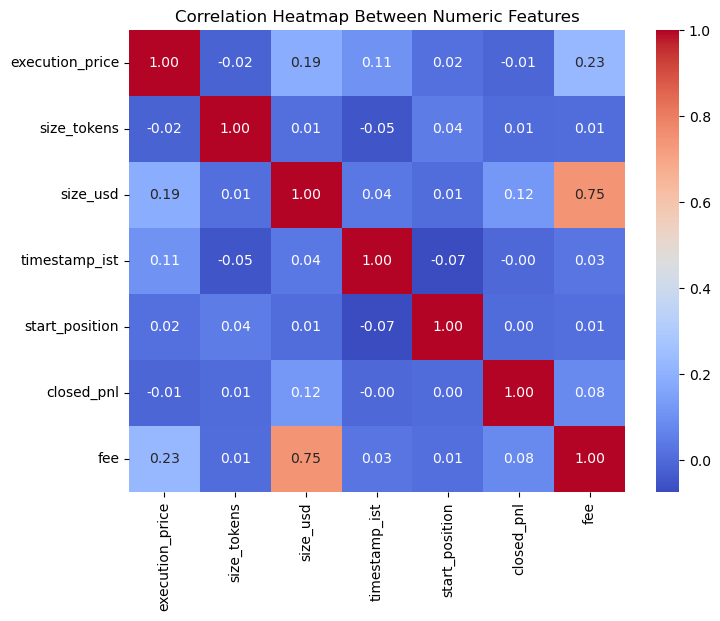

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Between Numeric Features')
plt.show()


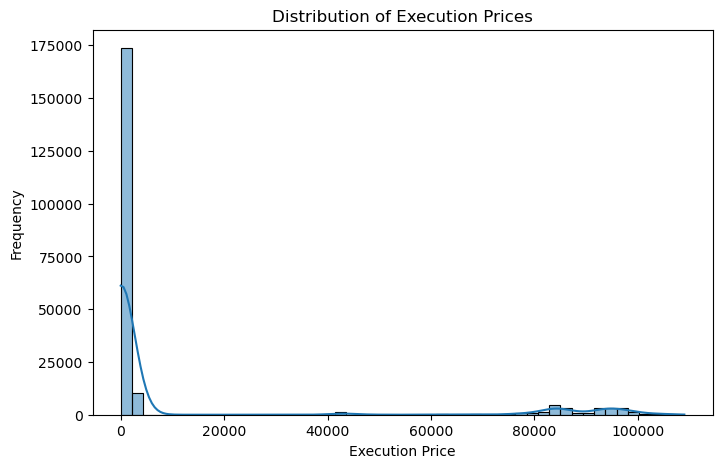

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(historical_df['execution_price'], kde=True, bins=50)
plt.title('Distribution of Execution Prices')
plt.xlabel('Execution Price')
plt.ylabel('Frequency')
plt.show()


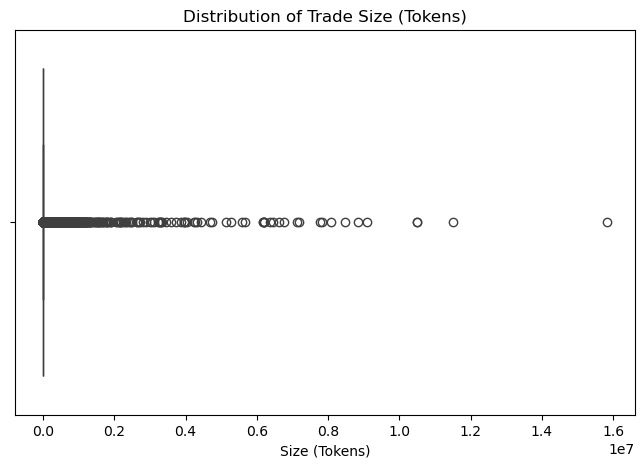

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(x=historical_df['size_tokens'])
plt.title('Distribution of Trade Size (Tokens)')
plt.xlabel('Size (Tokens)')
plt.show()


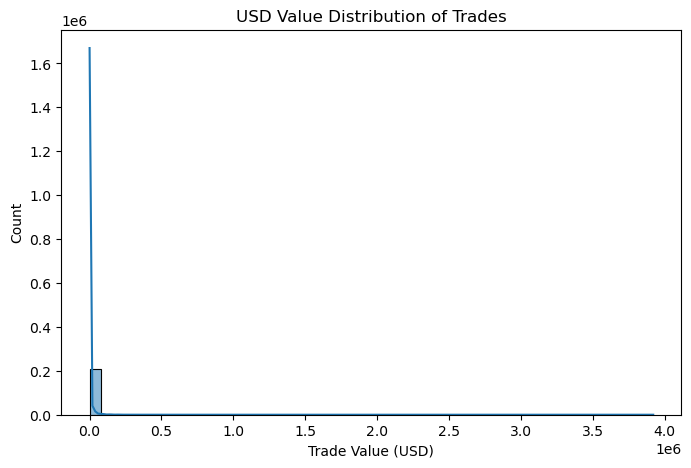

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(historical_df['size_usd'], kde=True, bins=50)
plt.title('USD Value Distribution of Trades')
plt.xlabel('Trade Value (USD)')
plt.ylabel('Count')
plt.show()


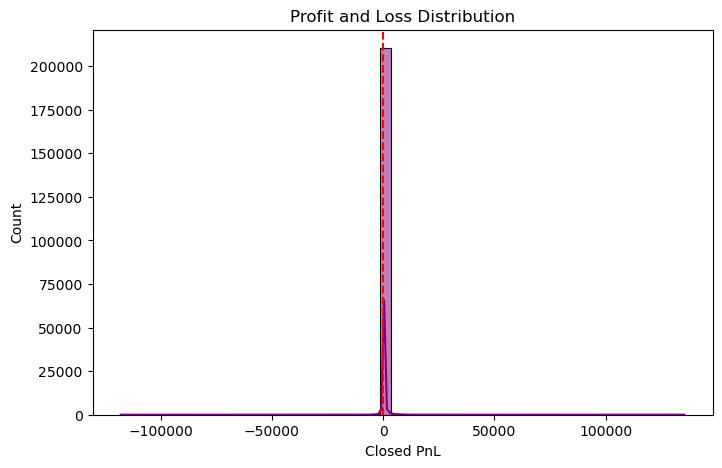

In [38]:
plt.figure(figsize=(8,5))
sns.histplot(historical_df['closed_pnl'], kde=True, color='purple', bins=50)
plt.title('Profit and Loss Distribution')
plt.xlabel('Closed PnL')
plt.ylabel('Count')
plt.axvline(0, color='red', linestyle='--')
plt.show()


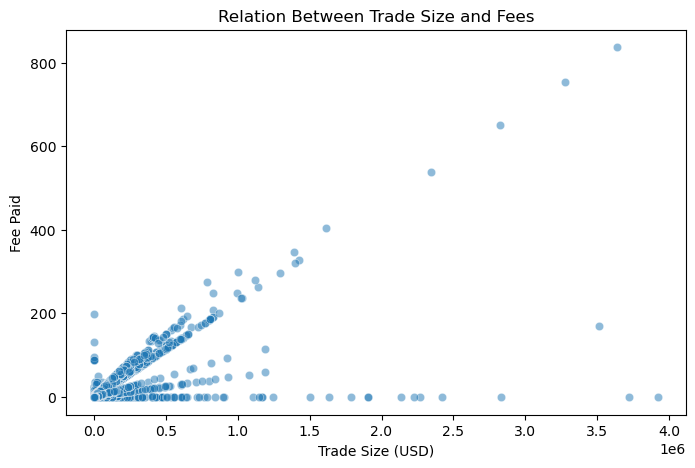

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='size_usd', y='fee', data=historical_df, alpha=0.5)
plt.title('Relation Between Trade Size and Fees')
plt.xlabel('Trade Size (USD)')
plt.ylabel('Fee Paid')
plt.show()


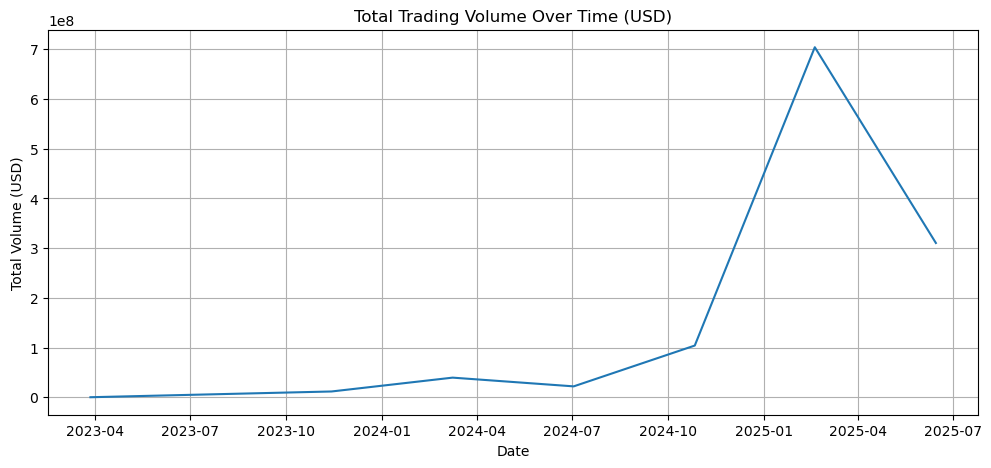

In [40]:
historical_df['date'] = historical_df['timestamp'].dt.date
daily_volume = historical_df.groupby('date')['size_usd'].sum()
plt.figure(figsize=(12,5))
plt.plot(daily_volume.index, daily_volume.values)
plt.title('Total Trading Volume Over Time (USD)')
plt.xlabel('Date')
plt.ylabel('Total Volume (USD)')
plt.grid(True)
plt.show()


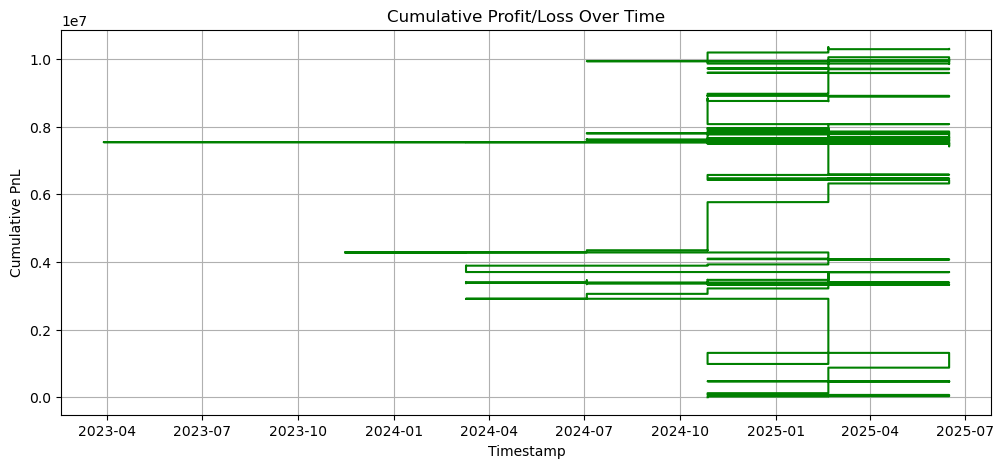

In [41]:
historical_df['cum_pnl'] = historical_df['closed_pnl'].cumsum()
plt.figure(figsize=(12,5))
plt.plot(historical_df['timestamp'], historical_df['cum_pnl'], color='green')
plt.title('Cumulative Profit/Loss Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Cumulative PnL')
plt.grid(True)
plt.show()


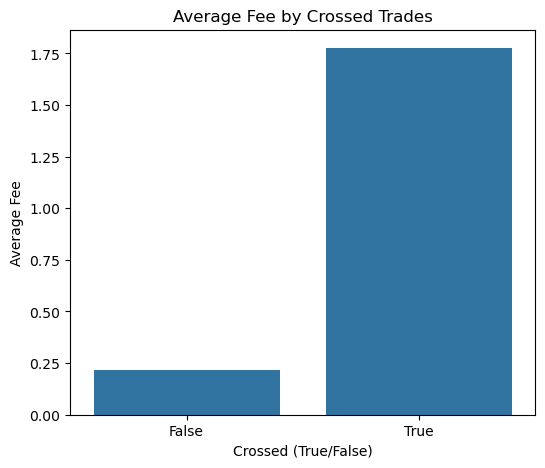

In [42]:
crossed_fee = historical_df.groupby('crossed')['fee'].mean()
plt.figure(figsize=(6,5))
sns.barplot(x=crossed_fee.index, y=crossed_fee.values)
plt.title('Average Fee by Crossed Trades')
plt.xlabel('Crossed (True/False)')
plt.ylabel('Average Fee')
plt.show()


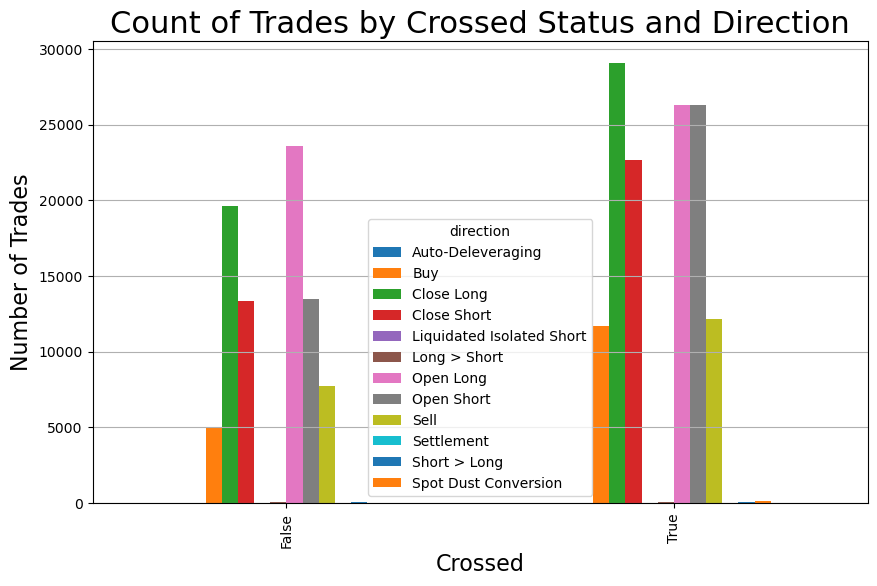

In [43]:
crossed_direction = historical_df.groupby(['crossed', 'direction']).size().unstack(fill_value=0)

crossed_direction.plot(kind='bar', figsize=(10,6))
plt.title("Count of Trades by Crossed Status and Direction", fontsize=22)
plt.xlabel("Crossed", fontsize=16)
plt.ylabel("Number of Trades", fontsize=16)
plt.grid(axis="y")
plt.show()

# Analysis on fer greed dataset

In [45]:
# Load the daily Bitcoin Fear & Greed Index
sentiment_df = pd.read_csv('fear_greed_index.csv')

In [46]:
sentiment_df

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [47]:
# Convert timestamp to datetime
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], unit='s', errors='coerce')

# Convert date column to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')


In [48]:
sentiment_df

,timestamp,value,classification,date
0,2018-02-01 05:30:00,30,Fear,2018-02-01
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02
2,2018-02-03 05:30:00,40,Fear,2018-02-03
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,2025-04-28 05:30:00,54,Neutral,2025-04-28
2640,2025-04-29 05:30:00,60,Greed,2025-04-29
2641,2025-04-30 05:30:00,56,Greed,2025-04-30
2642,2025-05-01 05:30:00,53,Neutral,2025-05-01


In [49]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   datetime64[ns]
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 82.8+ KB


In [50]:
sentiment_df.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

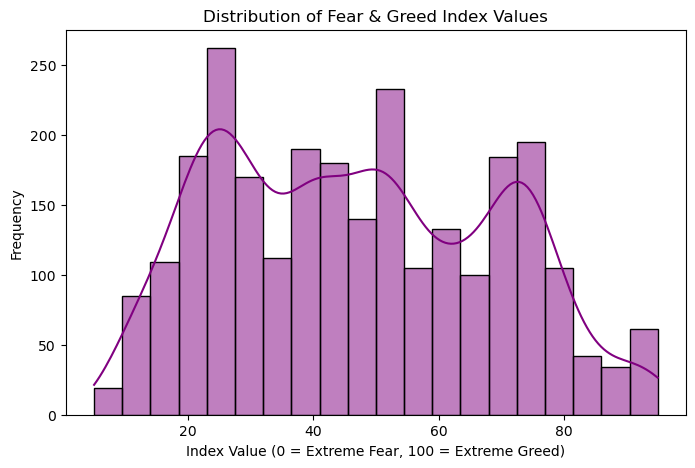

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(sentiment_df['value'], bins=20, kde=True, color='purple')
plt.title("Distribution of Fear & Greed Index Values")
plt.xlabel("Index Value (0 = Extreme Fear, 100 = Extreme Greed)")
plt.ylabel("Frequency")
plt.show()


C:\Users\vansh\AppData\Local\Temp\ipykernel_34228\2614137343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classification', data=sentiment_df,


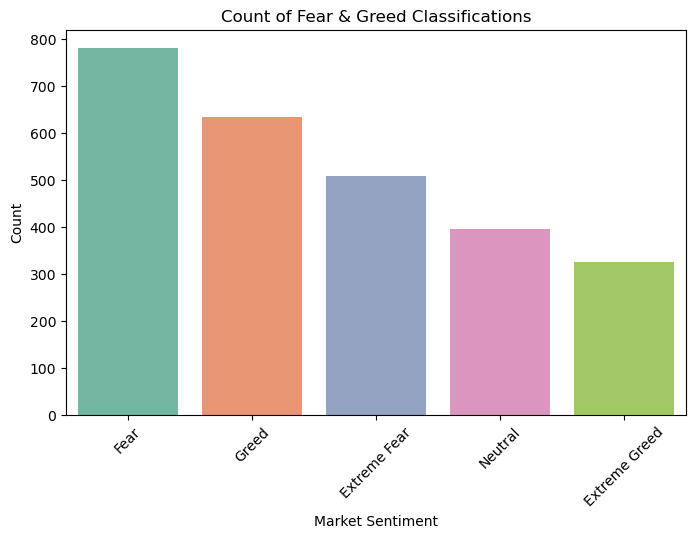

In [52]:
plt.figure(figsize=(8,5))
sns.countplot(x='classification', data=sentiment_df,
              order=sentiment_df['classification'].value_counts().index,
              palette="Set2")
plt.title("Count of Fear & Greed Classifications")
plt.xlabel("Market Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


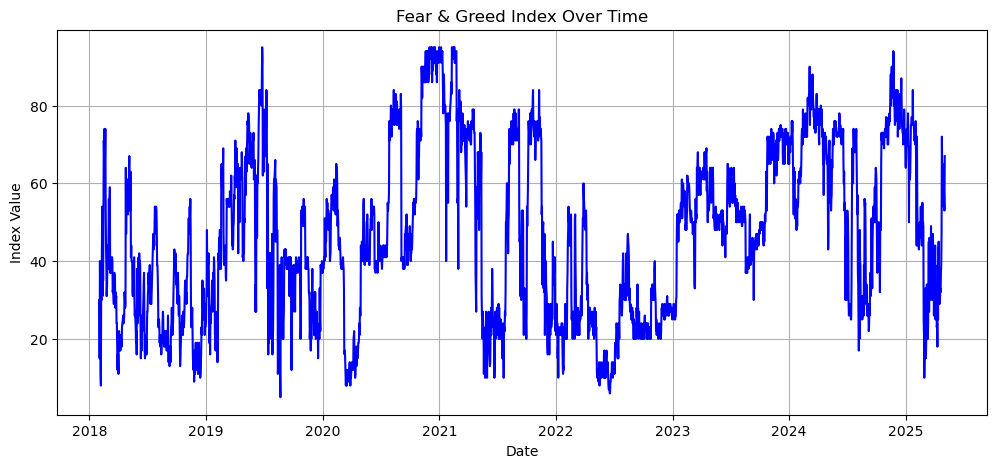

In [53]:
plt.figure(figsize=(12,5))
plt.plot(sentiment_df['date'], sentiment_df['value'], color='blue')
plt.title("Fear & Greed Index Over Time")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.grid(True)
plt.show()


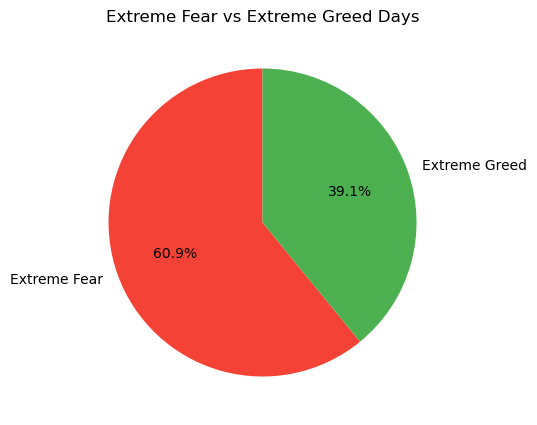

In [54]:
extremes = sentiment_df[sentiment_df['classification'].isin(['Extreme Fear','Extreme Greed'])]
extreme_counts = extremes['classification'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(extreme_counts, labels=extreme_counts.index, autopct='%1.1f%%', startangle=90, colors=['#F44336','#4CAF50'])
plt.title("Extreme Fear vs Extreme Greed Days")
plt.show()


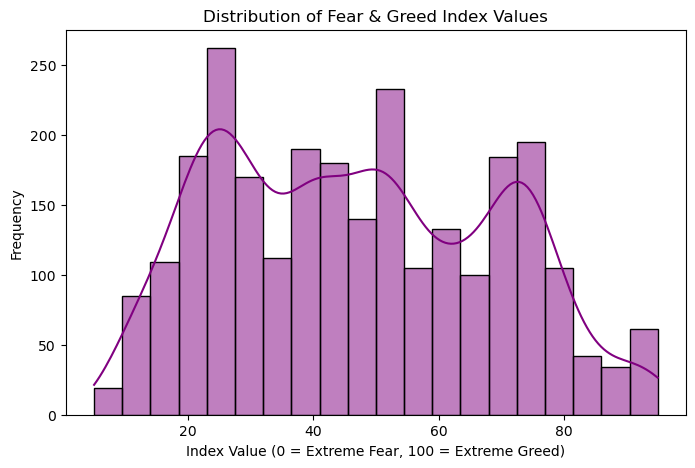

In [55]:
plt.figure(figsize=(8,5))
sns.histplot(sentiment_df['value'], bins=20, kde=True, color='purple')
plt.title("Distribution of Fear & Greed Index Values")
plt.xlabel("Index Value (0 = Extreme Fear, 100 = Extreme Greed)")
plt.ylabel("Frequency")
plt.show()


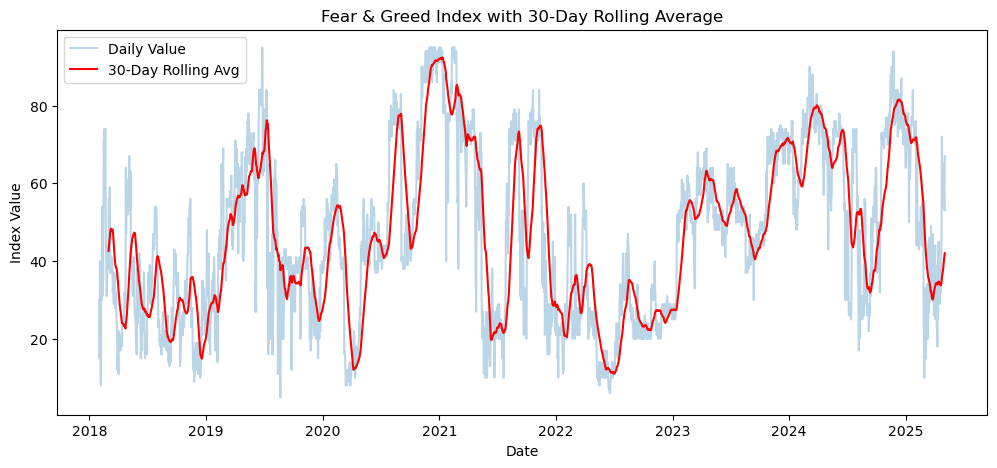

In [56]:
sentiment_df['rolling_30d'] = sentiment_df['value'].rolling(window=30).mean()

plt.figure(figsize=(12,5))
plt.plot(sentiment_df['date'], sentiment_df['value'], alpha=0.3, label='Daily Value')
plt.plot(sentiment_df['date'], sentiment_df['rolling_30d'], color='red', label='30-Day Rolling Avg')
plt.title("Fear & Greed Index with 30-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.show()


C:\Users\vansh\AppData\Local\Temp\ipykernel_34228\619368380.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classification_pct.index, y=classification_pct.values, palette="Set3")


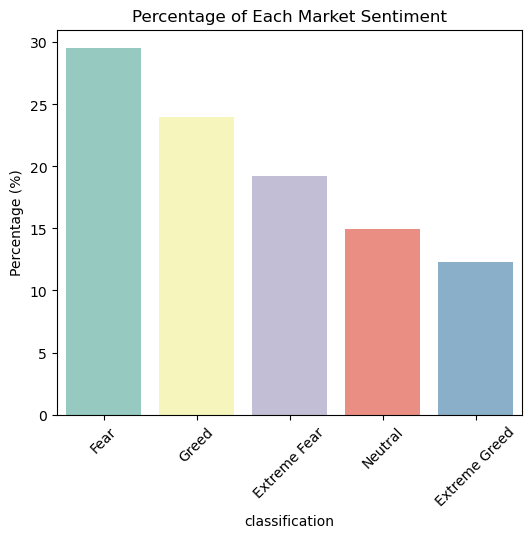

In [57]:
classification_pct = sentiment_df['classification'].value_counts(normalize=True)*100

plt.figure(figsize=(6,5))
sns.barplot(x=classification_pct.index, y=classification_pct.values, palette="Set3")
plt.title("Percentage of Each Market Sentiment")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()


# Trading behavior

In [ ]:
sentiment_df = pd.read_csv('fear_greed_index.csv')

In [58]:
historical_df=pd.read_csv('historical_data.csv')

In [59]:
df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [60]:
df['Timestamp IST']=pd.to_datetime(df['Timestamp IST'],format='%d-%m-%Y %H:%M', errors='coerce')

In [72]:
df.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02


In [62]:
df['date'] = df['Timestamp IST'].dt.date

In [63]:
df['date']=pd.to_datetime(df['date'], errors='coerce')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [65]:
daily_metrics = df.groupby('date').agg({
    'Closed PnL': 'sum',          # Profitability
    'Size USD': 'sum',            # Total traded USD
    'Size Tokens': 'sum',         # Total tokens traded
    'Execution Price': 'mean',    # Avg price (context)
}).reset_index()

In [66]:
daily_metrics

,date,Closed PnL,Size USD,Size Tokens,Execution Price
0,2023-05-01,0.000000,477.00,2.513000e-01,1898.133333
1,2023-12-05,0.000000,50005.83,1.180901e+01,11038.300000
2,2023-12-14,-205.434737,113203.35,4.092289e+03,8031.868818
3,2023-12-15,-24.632034,10609.95,3.558000e+03,2.982000
4,2023-12-16,0.000000,15348.77,3.989700e+04,0.384707
...,...,...,...,...,...
475,2025-04-27,2702.067468,487537.69,3.887430e+06,13133.751885
476,2025-04-28,36906.813759,26124921.49,2.152493e+05,58469.141862
477,2025-04-29,125749.613427,34089511.66,2.974820e+05,28548.785993
478,2025-04-30,14003.797269,12693878.85,1.559761e+05,35649.303644


In [70]:
merged_df = pd.merge(
    daily_metrics,
    sentiment_df[['date', 'value', 'classification']],
    on='date',
    how='inner' 
)

In [75]:
merged_df=merged_df.rename(columns={"classification": "sentiment"})

In [76]:
merged_df

,date,Closed PnL,Size USD,Size Tokens,Execution Price,value,sentiment
0,2023-05-01,0.000000,477.00,2.513000e-01,1898.133333,63,Greed
1,2023-12-05,0.000000,50005.83,1.180901e+01,11038.300000,75,Extreme Greed
2,2023-12-14,-205.434737,113203.35,4.092289e+03,8031.868818,72,Greed
3,2023-12-15,-24.632034,10609.95,3.558000e+03,2.982000,70,Greed
4,2023-12-16,0.000000,15348.77,3.989700e+04,0.384707,67,Greed
...,...,...,...,...,...,...,...
474,2025-04-27,2702.067468,487537.69,3.887430e+06,13133.751885,61,Greed
475,2025-04-28,36906.813759,26124921.49,2.152493e+05,58469.141862,54,Neutral
476,2025-04-29,125749.613427,34089511.66,2.974820e+05,28548.785993,60,Greed
477,2025-04-30,14003.797269,12693878.85,1.559761e+05,35649.303644,56,Greed


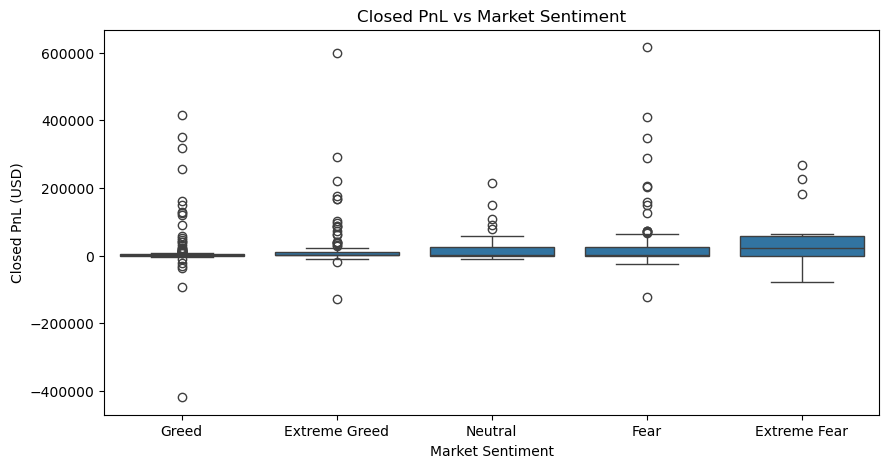

In [77]:
plt.figure(figsize=(10,5))
sns.boxplot(x='sentiment', y='Closed PnL', data=merged_df)
plt.title('Closed PnL vs Market Sentiment')
plt.ylabel('Closed PnL (USD)')
plt.xlabel('Market Sentiment')
plt.show()

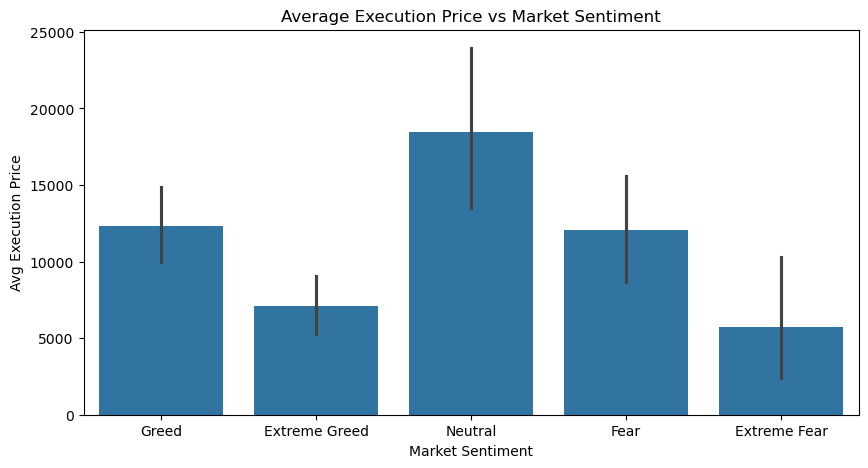

In [79]:
plt.figure(figsize=(10,5))
sns.barplot(x='sentiment', y='Execution Price', data=merged_df, estimator='mean')
plt.title('Average Execution Price vs Market Sentiment')
plt.ylabel('Avg Execution Price')
plt.xlabel('Market Sentiment')
plt.show()


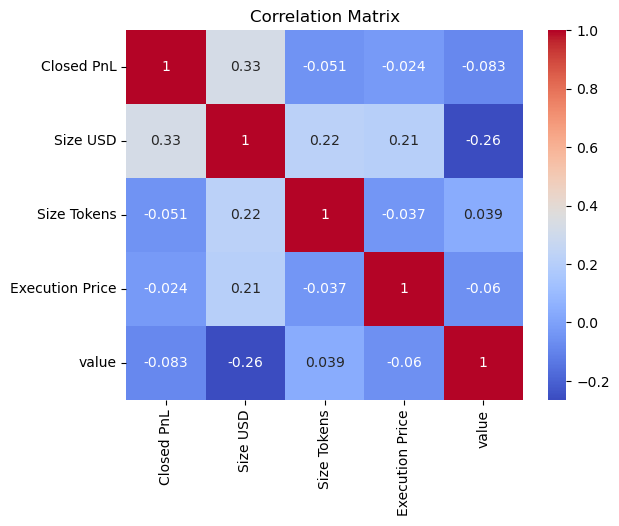

In [81]:
corr = merged_df[['Closed PnL', 'Size USD', 'Size Tokens', 'Execution Price', 'value']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


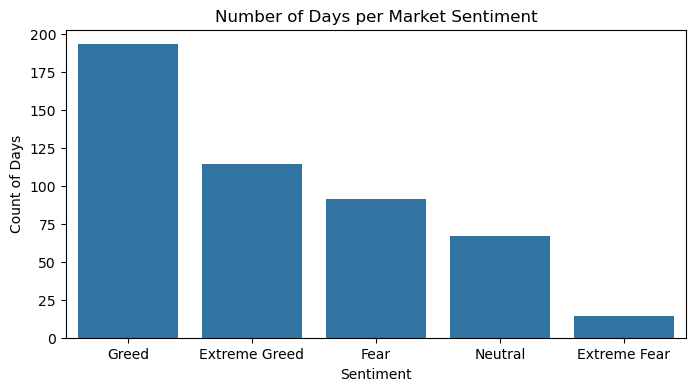

In [84]:
plt.figure(figsize=(8,4))
sns.countplot(x='sentiment', data=merged_df, order=merged_df['sentiment'].value_counts().index)
plt.title('Number of Days per Market Sentiment')
plt.ylabel('Count of Days')
plt.xlabel('Sentiment')
plt.show()

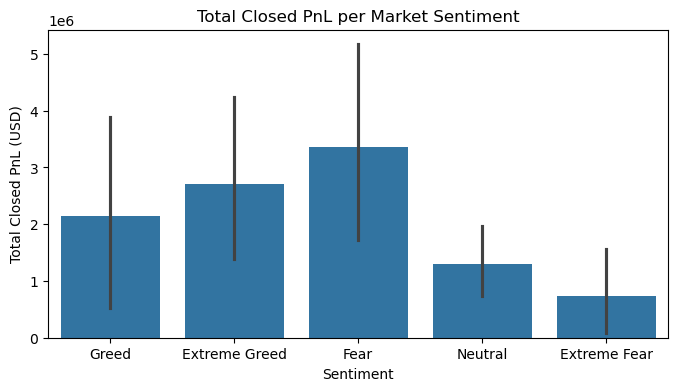

In [85]:
plt.figure(figsize=(8,4))
sns.barplot(x='sentiment', y='Closed PnL', data=merged_df, estimator=sum, order=merged_df['sentiment'].value_counts().index)
plt.title('Total Closed PnL per Market Sentiment')
plt.ylabel('Total Closed PnL (USD)')
plt.xlabel('Sentiment')
plt.show()


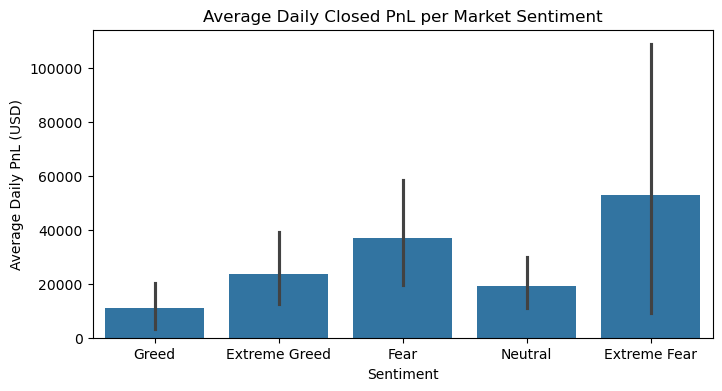

In [86]:
plt.figure(figsize=(8,4))
sns.barplot(x='sentiment', y='Closed PnL', data=merged_df, estimator='mean', order=merged_df['sentiment'].value_counts().index)
plt.title('Average Daily Closed PnL per Market Sentiment')
plt.ylabel('Average Daily PnL (USD)')
plt.xlabel('Sentiment')
plt.show()

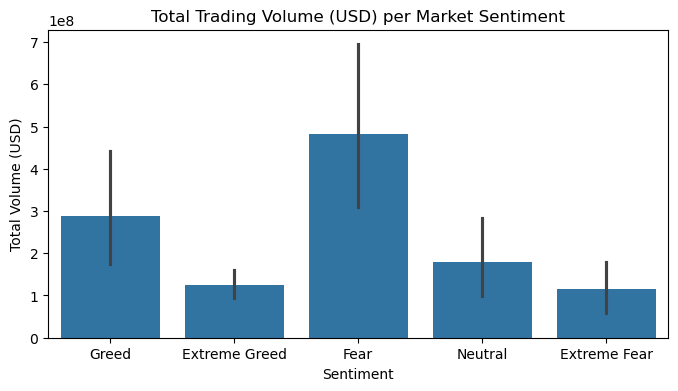

In [87]:
plt.figure(figsize=(8,4))
sns.barplot(x='sentiment', y='Size USD', data=merged_df, estimator=sum, order=merged_df['sentiment'].value_counts().index)
plt.title('Total Trading Volume (USD) per Market Sentiment')
plt.ylabel('Total Volume (USD)')
plt.xlabel('Sentiment')
plt.show()

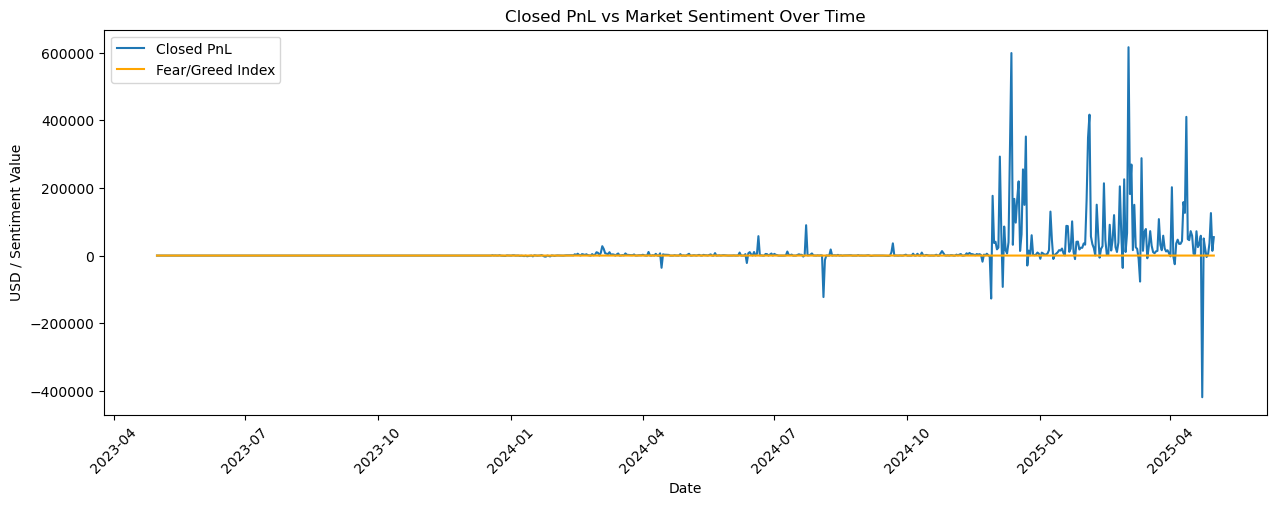

In [91]:
plt.figure(figsize=(15,5))
sns.lineplot(x='date', y='Closed PnL', data=merged_df, label='Closed PnL')
sns.lineplot(x='date', y='value', data=merged_df, label='Fear/Greed Index', color='orange')
plt.title('Closed PnL vs Market Sentiment Over Time')
plt.ylabel('USD / Sentiment Value')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()

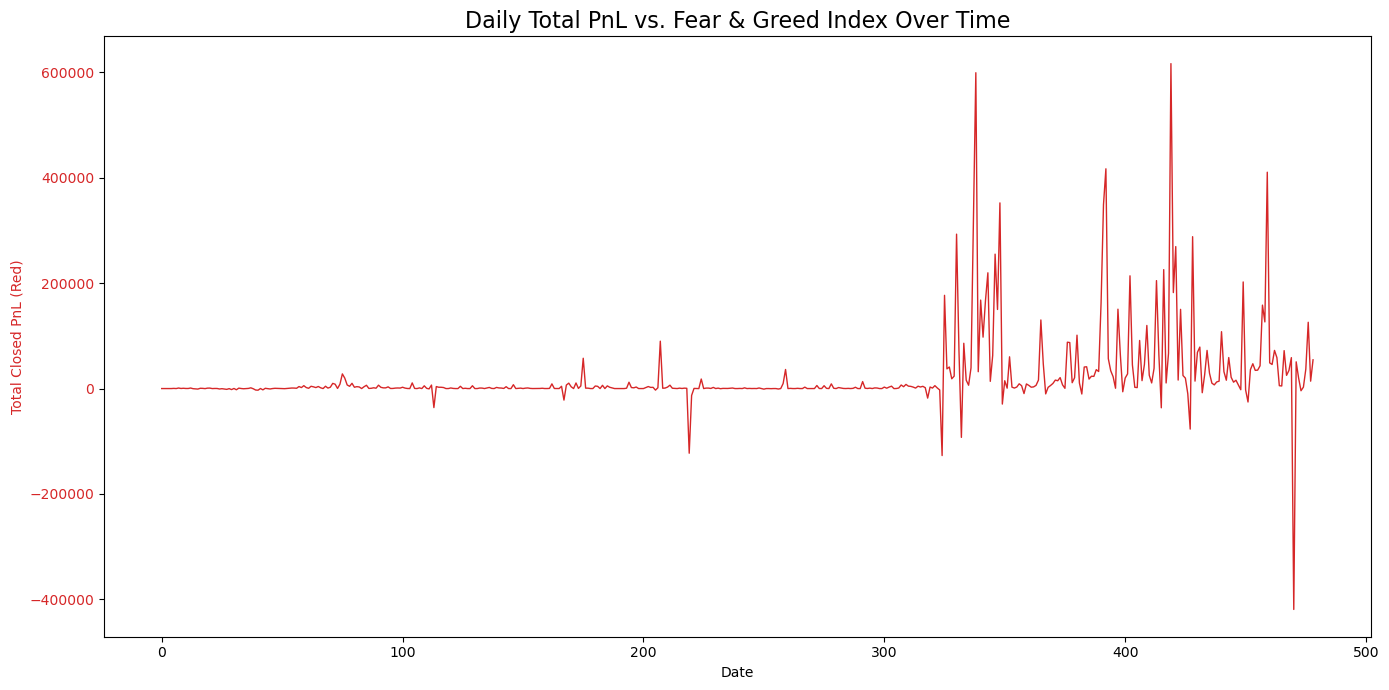

In [96]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Total PnL (Primary Axis)
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Closed PnL (Red)', color=color)
ax1.plot(merged_df.index, merged_df['Closed PnL'], color=color, linewidth=1)
ax1.tick_params(axis='y', labelcolor=color)

plt.title('Daily Total PnL vs. Fear & Greed Index Over Time', fontsize=16)
fig.tight_layout()  
plt.savefig('outputs/PnL_and_Sentiment_Time_Series.png')
plt.show()

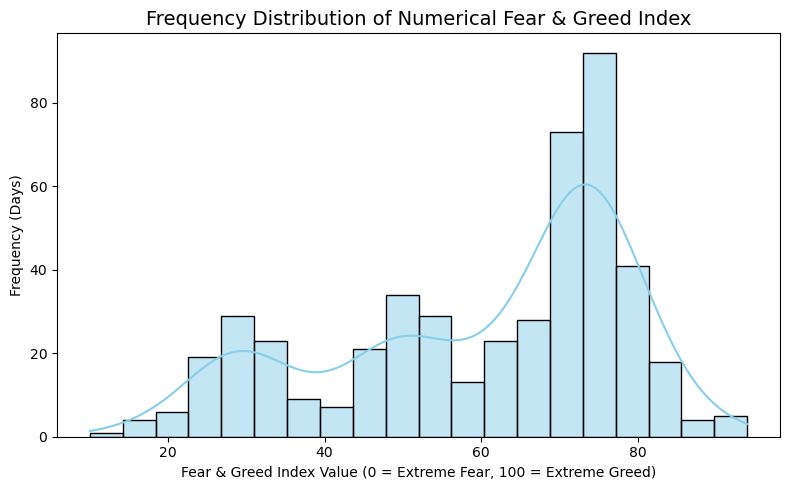

In [97]:
plt.figure(figsize=(8, 5))


sns.histplot(
    data=merged_df,
    x='value',
    bins=20, 
    kde=True, 
    color='skyblue'
)


plt.title('Frequency Distribution of Numerical Fear & Greed Index', fontsize=14)
plt.xlabel('Fear & Greed Index Value (0 = Extreme Fear, 100 = Extreme Greed)')
plt.ylabel('Frequency (Days)')
plt.tight_layout()


plt.savefig('outputs/Hist_F&G_Index_Value.png')
plt.show()

In [107]:
Observed_Days=sentiment_df['date'].value_counts().values

In [ ]:
keys= visa_df['continent'].value_counts().keys()
values=visa_df['continent'].value_counts().values
plt.pie(values,labels=keys,autopct='%0.2f%%')

In [117]:
merged_df

,date,Closed PnL,Size USD,Size Tokens,Execution Price,value,sentiment
0,2023-05-01,0.000000,477.00,2.513000e-01,1898.133333,63,Greed
1,2023-12-05,0.000000,50005.83,1.180901e+01,11038.300000,75,Extreme Greed
2,2023-12-14,-205.434737,113203.35,4.092289e+03,8031.868818,72,Greed
3,2023-12-15,-24.632034,10609.95,3.558000e+03,2.982000,70,Greed
4,2023-12-16,0.000000,15348.77,3.989700e+04,0.384707,67,Greed
...,...,...,...,...,...,...,...
474,2025-04-27,2702.067468,487537.69,3.887430e+06,13133.751885,61,Greed
475,2025-04-28,36906.813759,26124921.49,2.152493e+05,58469.141862,54,Neutral
476,2025-04-29,125749.613427,34089511.66,2.974820e+05,28548.785993,60,Greed
477,2025-04-30,14003.797269,12693878.85,1.559761e+05,35649.303644,56,Greed


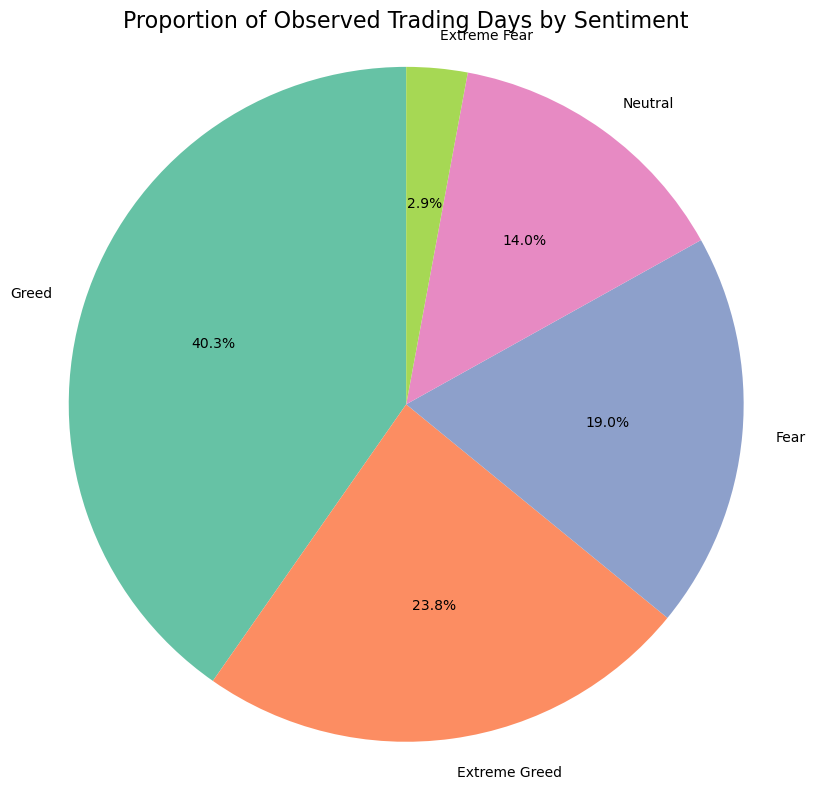

In [122]:
keys=merged_df['sentiment'].value_counts().keys()
values=merged_df['sentiment'].value_counts().values

plt.figure(figsize=(8, 8))
plt.pie(
    values,
    labels=keys,
    autopct='%1.1f%%', # Show percentages
    startangle=90,
    colors=sns.color_palette("Set2")
)
plt.title('Proportion of Observed Trading Days by Sentiment', fontsize=16)
plt.axis('equal') # Ensures the pie chart is circular
plt.tight_layout()